In [20]:
!pip install leidenalg

In [19]:
!pip install networkx python-igraph=="0.11.3" matplotlib leidenalg

  Using cached igraph-0.11.3-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
INFO: pip is looking at multiple versions of leidenalg to determine which version is compatible with other requirements. This could take a while.
  Using cached leidenalg-0.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached leidenalg-0.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached leidenalg-0.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached leidenalg-0.8.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached leidenalg-0.8.9.tar.gz (3.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached leidenalg-0.8.8.tar.gz (3.7 MB)
  Installing build dependencies ... done
  Getting requirements to buil

In [21]:
!pip freeze > requirements.txt

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
DATA_FOLDER = './data/'
EJ_A = 'amazon_graph.graphml'

ROUTE_EJ_A = DATA_FOLDER + EJ_A

# Apartado A - Detección de comunidades con el algoritmo de Leiden

In [38]:
amazon_graph = nx.read_graphml(ROUTE_EJ_A)

In [6]:
num_nodes = amazon_graph.number_of_nodes()

# Visualizar información básica del grafoprint(f"Número de nodos: {num_nodes}")
print(f"Número de aristas: {num_edges}")    

Número de aristas: 1184


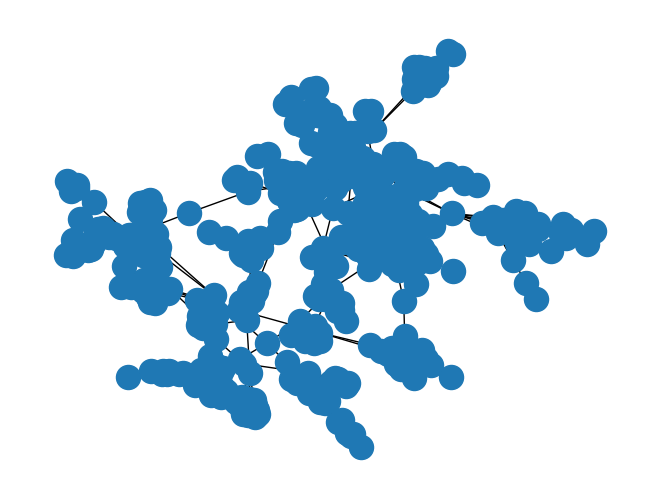

In [7]:
nx.draw(amazon_graph, with_labels=False)
plt.show()

In [9]:
"""import igraph as ig
import leidenalg

graph = ig.Graph.Read_GraphML(ROUTE_EJ_A)

# Aplicar el algoritmo de Leiden
particion = leidenalg.find_partition(graph, leidenalg.ModularityVertexPartition)

# Mostrar los resultados
for i, comunidad in enumerate(particion, 1):
    print(f"Comunidad {i}: {comunidad}")"""

'import igraph as ig\nimport leidenalg\n\ngraph = ig.Graph.Read_GraphML(ROUTE_EJ_A)\n\n# Aplicar el algoritmo de Leiden\nparticion = leidenalg.find_partition(graph, leidenalg.ModularityVertexPartition)\n\n# Mostrar los resultados\nfor i, comunidad in enumerate(particion, 1):\n    print(f"Comunidad {i}: {comunidad}")'

In [10]:
import igraph as ig
import leidenalg
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Cargar el grafo
DATA_FOLDER = './data/'
EJ_A = 'amazon_graph.graphml'
ROUTE_EJ_A = DATA_FOLDER + EJ_A

graph = ig.Graph.Read_GraphML(ROUTE_EJ_A)

# Aplicar el algoritmo de Leiden
particion = leidenalg.find_partition(graph, leidenalg.ModularityVertexPartition)

# Asignar colores a cada comunidad
colores = list(mcolors.TABLEAU_COLORS.keys())  # o cualquier otro esquema de colores
color_dict = {}
for i, comunidad in enumerate(particion):
    for nodo in comunidad:
        color_dict[nodo] = colores[i % len(colores)]

graph.vs["color"] = [color_dict[node] for node in range(len(graph.vs))]

# Dibujar el grafo
layout = graph.layout("fr")  # Puedes experimentar con diferentes layouts
ig.plot(graph, layout=layout, vertex_size=20, vertex_label=None, 
        edge_width=0.5, edge_color="gray", target='graph.png')

# Mostrar el grafo
img = plt.imread('graph.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'ig'

In [25]:
import networkx as nx

# Suponiendo que ya tienes tu grafo amazon_graph en networkx

def leiden_algorithm(graph):
    # Inicializamos los nodos en comunidades individuales
    partition = {node: i for i, node in enumerate(graph.nodes())}

    def modularity_gain(node, community):
        intra_community_degree = sum(graph[node][neighbour].get('weight', 1) for neighbour in graph.neighbors(node) if partition[neighbour] == community)
        degree = sum(graph[node][neighbour].get('weight', 1) for neighbour in graph.neighbors(node))
        community_degree = sum(degree for n, c in partition.items() if c == community)
        m = sum(graph[node][neighbour].get('weight', 1) for node, neighbour in graph.edges())
        q = (intra_community_degree - (community_degree * degree) / (2 * m)) / (2 * m)
        return q

    def get_best_community(node):
        current_community = partition[node]
        best_community = current_community
        max_gain = 0.0
        for neighbor in graph.neighbors(node):
            for community in set(partition.values()):
                gain = modularity_gain(node, community)
                if gain > max_gain:
                    max_gain = gain
                    best_community = community
        return best_community

    def update_partition():
        for node in graph.nodes():
            best_community = get_best_community(node)
            partition[node] = best_community

    # Fase de optimización
    # Podríamos iterar aquí hasta que no haya más cambios en la partición
    for i in range(10):  # Hacemos 10 iteraciones para simplificar
        update_partition()

    # Convertimos los resultados a una lista de comunidades
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)

    return list(communities.values())

# Aplicamos el algoritmo de Leiden a tu grafo
amazon_communities = leiden_algorithm(amazon_graph)
print(amazon_communities)


KeyboardInterrupt: 

In [47]:
from multiprocessing import Pool
import networkx


def visualize_graph(graph, communities):
    colors = [communities[node] for node in graph.nodes()]
    pos = nx.spring_layout(graph)  # Posicionamiento de los nodos
    nx.draw(graph, pos, node_color=colors, with_labels=True, node_size=50, font_size=8)
    plt.show()

def calculate_modularity_gain(graph, node, new_community, communities):
    # Parámetros para calcular la modularidad
    total_edge_weight = sum(weight for _, _, weight in graph.edges(data='weight', default=1))
    node_degree = graph.degree(node, weight='weight')
    community_degree = sum(graph.degree(n, weight='weight') for n, comm in communities.items() if comm == new_community)

    # Peso de las aristas internas de la comunidad
    internal_weight = sum(graph[node][n].get('weight', 1) for n in graph.neighbors(node) if communities[n] == new_community)

    # Cálculo de la ganancia de modularidad
    modularity_gain = internal_weight - (node_degree * community_degree) / (2 * total_edge_weight)
    return modularity_gain


def leiden_algorithm(graph, iterations=10, pool_size=7):
    communities = {node: i for i, node in enumerate(graph.nodes())}

    with Pool(pool_size) as pool:
        for _ in range(iterations):
            # Preparar los datos para el proceso paralelo
            tasks = [(node, graph, communities) for node in graph.nodes()]
            results = pool.starmap(assign_node_to_community, tasks)

            # Actualizar las comunidades basadas en los resultados
            for node, best_community in results:
                communities[node] = best_community

    return communities

def assign_node_to_community(node, graph, communities):
    best_community = communities[node]
    best_gain = 0
    for neighbor in graph.neighbors(node):
        community = communities[neighbor]
        gain = calculate_modularity_gain(graph, node, community, communities)
        if gain > best_gain:
            best_gain = gain
            best_community = community
    
    return node, best_community

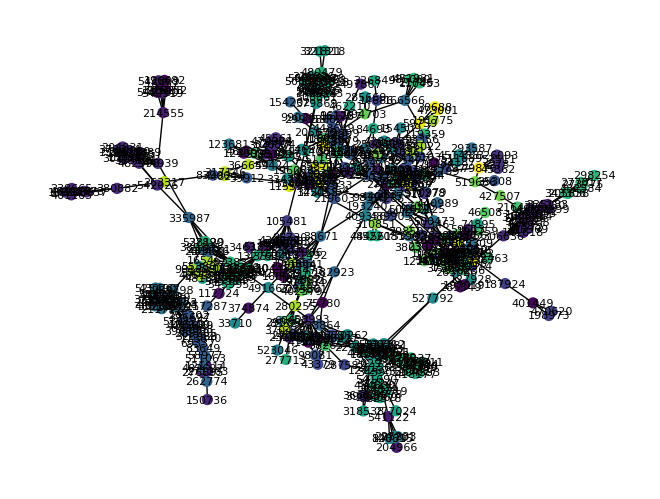

In [48]:
communities = leiden_algorithm(amazon_graph)
visualize_graph(amazon_graph, communities)

In [49]:
print(len(set(communities)))

475


# Ejercicio B – Algoritmo Evolutivo multiobjetivo

In [50]:
import networkx as nx

def create_initial_population_from_file(num_partitions):
    graph = nx.read_graphml(ROUTE_EJ_A)
    
    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return graph, population

"""
num_partitions = 5  # Número de particiones

graph, initial_population = create_initial_population_from_file(num_partitions)
print("Initial Population:", initial_population)"""

import random
import networkx as nx
import copy
import statistics

def create_initial_population(graph, num_partitions):
    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return population

def calculate_modularity(graph, partition):
    return nx.algorithms.community.modularity(graph, [set(partition) for partition in partition])

def select(population, fitness_function):
    tournament = random.choices(population, k=2)
    tournament_fitness = [fitness_function(individual) for individual in tournament]
    return tournament[tournament_fitness.index(max(tournament_fitness))]

def crossover(parent1, parent2):
    child = copy.deepcopy(parent1)
    for node in parent2:
        if node not in child:
            child.append(node)
    return child

def mutate(partition, mutation_rate):
    if random.random() < mutation_rate:
        node1, node2 = random.sample(partition, 2)
        partition[partition.index(node1)], partition[partition.index(node2)] = node2, node1
    return partition


def evolve(
    graph, num_partitions, mutation_rate, num_generations, trace_frequency=10
):
    population = create_initial_population(graph, num_partitions)
    
    ##############################
    # OJO: FITNESS AQUÍ A CHOLÓN #
    ##############################
    fitness_function = lambda partition: calculate_modularity(graph, partition)

    for gen in range(num_generations):
        new_population = []

        while len(new_population) < len(population):
            parent1 = select(population, fitness_function)
            parent2 = select(population, fitness_function)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        if trace_frequency > 0 and gen % trace_frequency == 0:
            best_fitness = max([fitness_function(individual) for individual in population])
            print(f"Generation {gen}: Best Fitness = {best_fitness}")

    best_partition = max(population, key=fitness_function)
    return best_partition, fitness_function(best_partition)

In [53]:
# Uso:
# Supongamos que 'G' es tu grafo de NetworkX
best_partition, best_fitness = evolve(amazon_graph, num_partitions=7, mutation_rate=0.1, num_generations=100)
print(f"Best Partition: {best_partition}")
print(f"Best Fitness: {best_fitness}")



"""
    ERROR CAUSADO POR LOS GENES (conjetura blitty) PORQUE SON DE TAMAÑO DINÁMICO
"""

NotAPartition: [{'0', '5', '9', '2'}, {'5', '7', '8', '0', '4', '2'}, {'7', '8', '0', '3', '9', '2'}, {'0', '5', '3', '8'}, {'7', '6', '4', '8'}, {'5', '7', '1', '9', '2'}, {'5', '1', '0', '3', '4', '2'}, {'5', '7', '8', '0', '9', '2'}, {'7', '0', '3', '1'}, {'5', '2', '4', '8'}, {'5', '0', '1', '4', '2'}, {'9', '3', '6'}, {'5', '7', '8', '0', '6'}, {'0', '9', '6', '2'}, {'7', '3', '4', '1'}, {'0', '9', '2'}, {'7', '1', '3', '4', '6'}, {'7', '0', '3', '9'}, {'7', '1', '8'}, {'0', '7', '4', '8'}, {'7', '8', '1', '4', '9'}, {'1', '5', '6', '2'}, {'8', '1', '4', '9', '6', '2'}, {'5', '8', '3', '4', '9'}, {'5', '7', '1', '3', '9'}, {'8', '1', '4', '9', '2'}, {'5', '3', '4', '6', '2'}, {'5', '8', '3', '6', '2'}, {'0', '5', '2'}, {'0', '3', '6', '2'}, {'7', '5', '6', '2'}, {'7', '1', '3', '4', '6', '2'}, {'7', '3', '4', '2'}, {'7', '0', '3', '4', '6'}, {'1', '5', '9', '2'}, {'7', '0', '4', '2'}, {'5', '3', '4', '8'}, {'1', '0', '3', '6', '2'}, {'8', '1', '0', '9', '2'}, {'8', '1', '0', '9', '6'}, {'1', '9', '4', '2'}, {'0', '3', '9', '6', '2'}, {'5', '9', '4', '8'}, {'1', '3', '4', '8'}, {'1', '3', '4', '6', '2'}, {'5', '7', '8', '3', '2'}, {'5', '1', '0', '3', '4'}, {'7', '0', '6', '1'}, {'7', '9', '3', '4'}, {'1', '9'}, {'5', '7', '8', '1', '6'}, {'8', '0', '1', '3', '2'}, {'1', '8', '7', '2'}, {'1', '5', '3', '8'}, {'5', '7', '1', '9', '2'}, {'8', '1', '4', '9', '6'}, {'5', '7', '0', '3', '6'}, {'1', '2', '4', '8'}, {'0', '9', '4', '1'}, {'1', '5', '7'}, {'5', '7', '8', '4', '9'}, {'7', '1', '3', '4', '9'}, {'5', '9', '4'}, {'1', '4', '2'}, {'1', '0', '3', '4', '6', '2'}, {'5', '0', '4', '6', '2'}, {'5', '7', '3', '4', '6'}] is not a valid partition of the graph Graph with 475 nodes and 1184 edges